## 12-2. Boston 주택 가격 예측 모델

In [21]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [22]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [23]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.

# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 훈련 데이터의 mean/std를 사용하여 처리합니다.
test_data -= mean
test_data /= std

In [24]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
model = models.Sequential([
    # 입력층
    layers.InputLayer(input_shape=(train_data.shape[1],), name='input'),

    # 1st block: Dense → BatchNorm → Activation
    layers.Dense(64, use_bias=False, name='dense_1'),
    layers.BatchNormalization(name='bn_1'),
    layers.Activation('tanh', name='act_1'),
    layers.Dropout(0.2),

    # 2nd block: Dense → BatchNorm → Activation
    layers.Dense(64, use_bias=False, name='dense_2'),
    layers.BatchNormalization(name='bn_2'),
    layers.Activation('tanh', name='act_2'),
    layers.Dropout(0.2),

    # 출력층
    layers.Dense(1, name='dense_3')
])

# 모델 구조 확인
model.summary()








Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_1 (BatchNormalization)       │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ act_1 (Activation)              │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_2 (BatchNormalization)       │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ act_2 (Activation)              │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,505 (21.50 KB)

 Trainable params: 5,249 (20.50 KB)

 Non-trainable params: 256 (1.00 KB)

In [25]:
# optimizer: RMSprop, loss는 MSE, metrics는 MAE
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [26]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.

from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('Boston_real_estate model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

BOS_history = model.fit(train_data, train_labels,
                           epochs=1000,
                           batch_size=32,
                           validation_split=0.2,
                           verbose = 1)

Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 597.3689 - mae: 22.5034 - val_loss: 619.7564 - val_mae: 23.3799
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 527.4537 - mae: 21.4092 - val_loss: 598.4175 - val_mae: 23.0962
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 515.0327 - mae: 21.4055 - val_loss: 580.4045 - val_mae: 22.8245
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 528.7684 - mae: 21.8959 - val_loss: 565.2687 - val_mae: 22.5724
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 516.8293 - mae: 21.5808 - val_loss: 549.2872 - val_mae: 22.2789
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 500.5507 - mae: 21.3052 - val_loss: 532.8535 - val_mae: 21.9657
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 493.6364 - mae: 21.0450 - val_loss: 518.9800 - val_mae: 21.7065
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 472.3532 - mae: 20.7262 - val_loss: 504.5186 - val_mae: 21.4056
Epoch 9

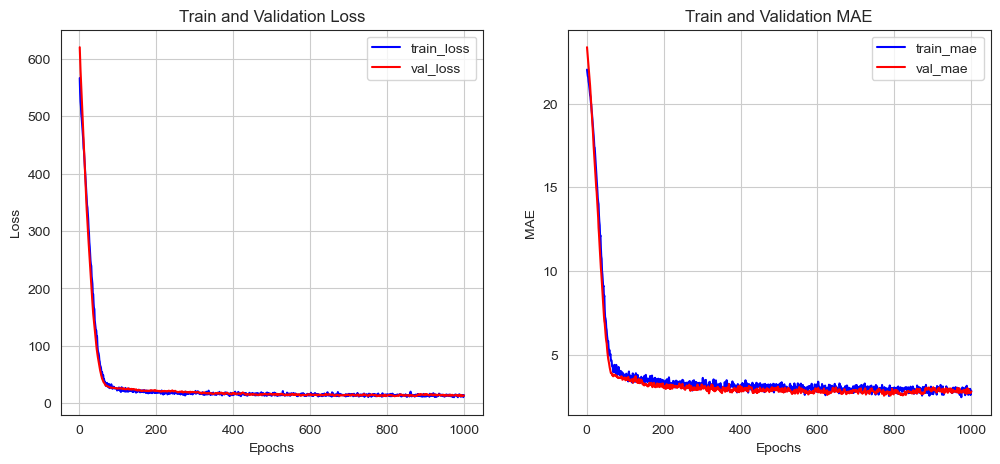

In [27]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
import seaborn as sns
sns.set_style('white')

history_dict = BOS_history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

In [28]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels, verbose=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.1167 - mae: 2.6924 


[16.936819076538086, 2.8541269302368164]

## 12-3. Reuters 딥러닝 모델 

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [30]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# Reuters 데이터셋 로드
(train_data, train_labels), (test_data, test_labels) = reuters.load_data()

# 훈련 데이터의 25%를 검증 데이터로 분리
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, 
    train_labels, 
    test_size=0.25, 
    random_state=42
)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [31]:
import numpy as np
from tensorflow.keras.utils import to_categorical

def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim), dtype='float32')
    for i, sequence in enumerate(data):
        for word_index in sequence:
            if word_index < dim:
                results[i, word_index] = 1.0
    return results

# 원-핫 인코딩 적용
x_train = one_hot_encoding(train_data)
x_val   = one_hot_encoding(val_data)
x_test  = one_hot_encoding(test_data)

# 레이블을 범주형(one-hot)으로 변환
y_train = to_categorical(train_labels)
y_val   = to_categorical(val_labels)
y_test  = to_categorical(test_labels)

In [32]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential([
    # Input layer
    layers.InputLayer(input_shape=(10000,), name='dense_24_input'),
    
    # 1st block: Dense → BatchNorm → Activation → Dropout
    layers.Dense(128, name='dense_24'),
    layers.BatchNormalization(name='batch_normalization_14'),
    layers.Activation('relu', name='activation_14'),
    layers.Dropout(0.5, name='dropout_14'),
    
    # 2nd block: Dense → BatchNorm → Activation → Dropout
    layers.Dense(128, name='dense_25'),
    layers.BatchNormalization(name='batch_normalization_15'),
    layers.Activation('relu', name='activation_15'),
    layers.Dropout(0.5, name='dropout_15'),
    
    # Output layer: 46 classes for Reuters
    layers.Dense(46, activation='softmax', name='dense_26')
])

# 컴파일
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303,598 (4.97 MB)

 Trainable params: 1,303,086 (4.97 MB)

 Non-trainable params: 512 (2.00 KB)

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint와 EarlyStopping 콜백 함수
checkpoint_cb = ModelCheckpoint(
    filepath='best_reuters_model.h5',   
    monitor='val_loss',                 
    save_best_only=True,                
    verbose=1
)
earlystop_cb = EarlyStopping(
    monitor='val_loss',                 
    patience=3,                         
    restore_best_weights=True,          
    verbose=1
)

# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 1/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2238 - loss: 3.5469
Epoch 1: val_loss improved from inf to 3.30647, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.2443 - loss: 3.4594 - val_accuracy: 0.6532 - val_loss: 3.3065
Epoch 2/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6385 - loss: 1.7350
Epoch 2: val_loss improved from 3.30647 to 2.98449, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6403 - loss: 1.7254 - val_accuracy: 0.7012 - val_loss: 2.9845
Epoch 3/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7056 - loss: 1.3610
Epoch 3: val_loss improved from 2.98449 to 2.71965, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7054 - loss: 1.3594 - val_accuracy: 0.7124 - val_loss: 2.7196
Epoch 4/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7479 - loss: 1.1198
Epoch 4: val_loss improved from 2.71965 to 2.45440, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7469 - loss: 1.1212 - val_accuracy: 0.7146 - val_loss: 2.4544
Epoch 5/50
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7644 - loss: 1.0064
Epoch 5: val_loss improved from 2.45440 to 2.21168, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7641 - loss: 1.0063 - val_accuracy: 0.7004 - val_loss: 2.2117
Epoch 6/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7825 - loss: 0.8989
Epoch 6: val_loss improved from 2.21168 to 1.95559, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7828 - loss: 0.8969 - val_accuracy: 0.7155 - val_loss: 1.9556
Epoch 7/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8108 - loss: 0.7863
Epoch 7: val_loss improved from 1.95559 to 1.78991, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8103 - loss: 0.7880 - val_accuracy: 0.6986 - val_loss: 1.7899
Epoch 8/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8239 - loss: 0.7194
Epoch 8: val_loss improved from 1.78991 to 1.61595, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.8239 - loss: 0.7189 - val_accuracy: 0.7195 - val_loss: 1.6159
Epoch 9/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8372 - loss: 0.6563
Epoch 9: val_loss improved from 1.61595 to 1.50197, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8374 - loss: 0.6560 - val_accuracy: 0.7150 - val_loss: 1.5020
Epoch 10/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8548 - loss: 0.5882
Epoch 10: val_loss improved from 1.50197 to 1.38008, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8545 - loss: 0.5904 - val_accuracy: 0.7413 - val_loss: 1.3801
Epoch 11/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8644 - loss: 0.5525
Epoch 11: val_loss improved from 1.38008 to 1.28121, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8644 - loss: 0.5526 - val_accuracy: 0.7618 - val_loss: 1.2812
Epoch 12/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8691 - loss: 0.5193
Epoch 12: val_loss improved from 1.28121 to 1.22359, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8701 - loss: 0.5168 - val_accuracy: 0.7462 - val_loss: 1.2236
Epoch 13/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8824 - loss: 0.4663
Epoch 13: val_loss improved from 1.22359 to 1.13125, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8822 - loss: 0.4673 - val_accuracy: 0.7814 - val_loss: 1.1312
Epoch 14/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8904 - loss: 0.4441
Epoch 14: val_loss improved from 1.13125 to 1.06991, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8904 - loss: 0.4451 - val_accuracy: 0.7863 - val_loss: 1.0699
Epoch 15/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8929 - loss: 0.4123
Epoch 15: val_loss improved from 1.06991 to 1.03541, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8932 - loss: 0.4134 - val_accuracy: 0.7823 - val_loss: 1.0354
Epoch 16/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9092 - loss: 0.3731
Epoch 16: val_loss improved from 1.03541 to 0.96777, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9086 - loss: 0.3746 - val_accuracy: 0.7956 - val_loss: 0.9678
Epoch 17/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9114 - loss: 0.3664
Epoch 17: val_loss improved from 0.96777 to 0.96151, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9112 - loss: 0.3660 - val_accuracy: 0.7952 - val_loss: 0.9615
Epoch 18/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9101 - loss: 0.3490
Epoch 18: val_loss improved from 0.96151 to 0.91037, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9101 - loss: 0.3490 - val_accuracy: 0.8108 - val_loss: 0.9104
Epoch 19/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9142 - loss: 0.3306
Epoch 19: val_loss improved from 0.91037 to 0.89360, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9144 - loss: 0.3308 - val_accuracy: 0.8143 - val_loss: 0.8936
Epoch 20/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9206 - loss: 0.3191
Epoch 20: val_loss improved from 0.89360 to 0.87713, saving model to best_reuters_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9207 - loss: 0.3190 - val_accuracy: 0.8210 - val_loss: 0.8771
Epoch 21/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9202 - loss: 0.3130
Epoch 21: val_loss did not improve from 0.87713
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9208 - loss: 0.3112 - val_accuracy: 0.8197 - val_loss: 0.8814
Epoch 22/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9319 - loss: 0.2840
Epoch 22: val_loss did not improve from 0.87713
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9319 - loss: 0.2836 - val_accuracy: 0.8170 - val_loss: 0.8879
Epoch 23/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9320 - loss: 0.2626
Epoch 23: val_loss did not improve from 0.87713
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9321 - loss: 0.2631 - val_accuracy: 0.8188 - val_loss: 0.8850
Epoch 23: early stopping
Restoring model weights from the end of the best epoch: 20.


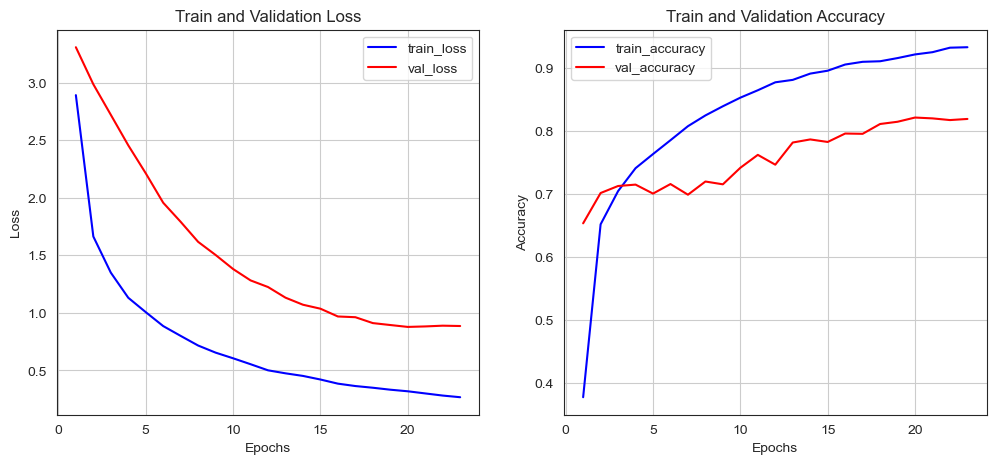

In [35]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import seaborn as sns 
sns.set_style('white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [36]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test, verbose=1)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8016 - loss: 0.9199


[0.9486234188079834, 0.7960819005966187]

## 12-4. CIFAR10 딥러닝 모델

In [68]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, utils
from tensorflow.keras.datasets import cifar10

In [ ]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(
    x_train_full,
    y_train_full,
    test_size=0.2,
    random_state=42,
    stratify=y_train_full
)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [70]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

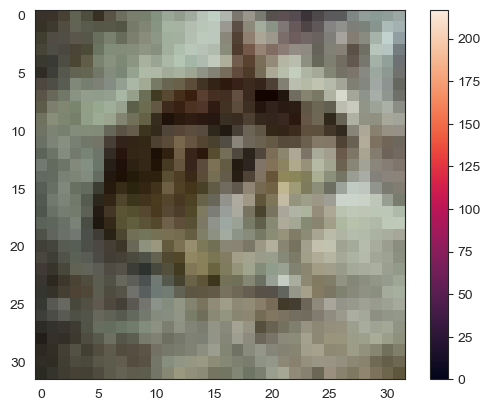

In [71]:
import seaborn as sns
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
sns.set_style('white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [72]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape((x_train.shape[0], 32*32*3))
x_val   = x_val.reshape((x_val.shape[0],   32*32*3))
x_test  = x_test.reshape((x_test.shape[0],  32*32*3))

print(x_train.shape)   
print(x_val.shape)     
print(x_test.shape)    

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [74]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [75]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

model = models.Sequential([
    # 입력층
    layers.InputLayer(input_shape=(3072,), name='input_15'),

    # block: Dense → BatchNorm → Activation → Dropout
    layers.Dense(2048, name='dense_91'),
    layers.BatchNormalization(name='batch_normalization_66'),
    layers.Activation('relu', name='activation_66'),
    layers.Dropout(0.5, name='dropout_66'),

    
    layers.Dense(1024, name='dense_92'),
    layers.BatchNormalization(name='batch_normalization_67'),
    layers.Activation('relu', name='activation_67'),
    layers.Dropout(0.5, name='dropout_67'),

    layers.Dense(512, name='dense_93'),
    layers.BatchNormalization(name='batch_normalization_68'),
    layers.Activation('relu', name='activation_68'),
    layers.Dropout(0.5, name='dropout_68'),

    # 출력층 (10개 클래스)
    layers.Dense(10, activation='softmax', name='dense_94')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [76]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_91 (Dense)                │ (None, 2048)           │     6,293,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_66 (Activation)      │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_67          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_67 (Activation)      │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_68          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_68 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,935,946 (34.09 MB)

 Trainable params: 8,928,778 (34.06 MB)

 Non-trainable params: 7,168 (28.00 KB)

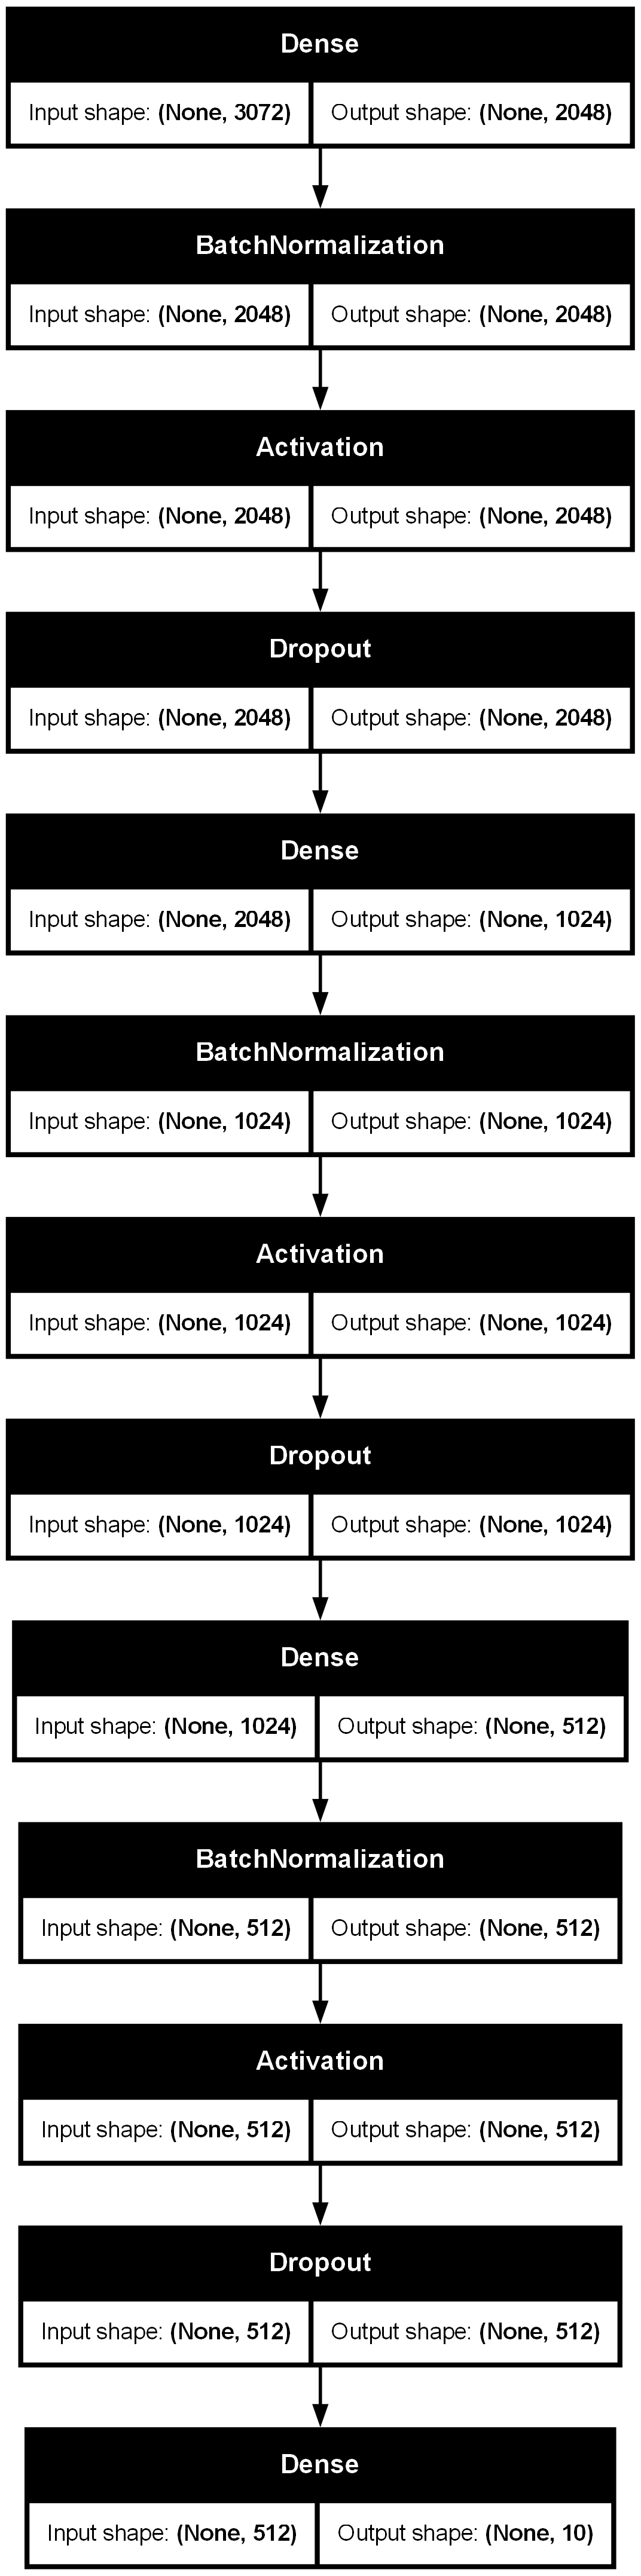

In [77]:
utils.plot_model(model, show_shapes=True)

In [78]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_cb = ModelCheckpoint(
    filepath='best_cifar10_model.h5',  
    monitor='val_loss',                
    save_best_only=True,               
    verbose=1
)
earlystop_cb = EarlyStopping(
    monitor='val_loss',                
    patience=5,                        
    restore_best_weights=True,         
    verbose=1
)

# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2727 - loss: 2.2068
Epoch 1: val_loss improved from inf to 1.90010, saving model to best_cifar10_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 75ms/step - accuracy: 0.2728 - loss: 2.2062 - val_accuracy: 0.3319 - val_loss: 1.9001
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3956 - loss: 1.6898
Epoch 2: val_loss improved from 1.90010 to 1.88105, saving model to best_cifar10_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.3956 - loss: 1.6897 - val_accuracy: 0.3352 - val_loss: 1.8810
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4381 - loss: 1.5540
Epoch 3: val_loss improved from 1.88105 to 1.81995, saving model to best_cifar10_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.4381 - loss: 1.5540 - val_accuracy: 0.3508 - val_loss: 1.8199
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4610 - loss: 1.4952
Epoch 4: val_loss did not improve from 1.81995
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.4610 - loss: 1.4951 - val_accuracy: 0.3553 - val_loss: 1.8566
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4868 - loss: 1.4286
Epoch 5: val_loss improved from 1.81995 to 1.63502, saving model to best_cifar10_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - accuracy: 0.4868 - loss: 1.4286 - val_accuracy: 0.4014 - val_loss: 1.6350
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5045 - loss: 1.3970
Epoch 6: val_loss did not improve from 1.63502
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.5045 - loss: 1.3970 - val_accuracy: 0.4063 - val_loss: 1.6436
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5142 - loss: 1.3598
Epoch 7: val_loss improved from 1.63502 to 1.58201, saving model to best_cifar10_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.5142 - loss: 1.3598 - val_accuracy: 0.4424 - val_loss: 1.5820
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5278 - loss: 1.3224
Epoch 8: val_loss improved from 1.58201 to 1.51626, saving model to best_cifar10_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.5278 - loss: 1.3224 - val_accuracy: 0.4563 - val_loss: 1.5163
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5357 - loss: 1.3006
Epoch 9: val_loss did not improve from 1.51626
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.5357 - loss: 1.3006 - val_accuracy: 0.3954 - val_loss: 1.7299
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5416 - loss: 1.2692
Epoch 10: val_loss did not improve from 1.51626
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - accuracy: 0.5416 - loss: 1.2692 - val_accuracy: 0.4399 - val_loss: 1.5825
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5573 - loss: 1.2431
Epoch 11: val_loss did not improve from 1.51626
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.5573 - loss: 1.2431 - val_accuracy: 0.4177 - val_loss: 1.6495
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5673 - loss: 1.2147
Epoch 12: val_loss improved fr

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.5673 - loss: 1.2147 - val_accuracy: 0.4786 - val_loss: 1.4526
Epoch 13/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5726 - loss: 1.1982
Epoch 13: val_loss improved from 1.45261 to 1.36643, saving model to best_cifar10_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.5726 - loss: 1.1983 - val_accuracy: 0.5188 - val_loss: 1.3664
Epoch 14/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5836 - loss: 1.1682
Epoch 14: val_loss did not improve from 1.36643
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.5836 - loss: 1.1682 - val_accuracy: 0.4797 - val_loss: 1.4830
Epoch 15/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5911 - loss: 1.1432
Epoch 15: val_loss did not improve from 1.36643
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.5911 - loss: 1.1432 - val_accuracy: 0.4519 - val_loss: 1.5642
Epoch 16/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5975 - loss: 1.1324
Epoch 16: val_loss did not improve from 1.36643
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.5975 - loss: 1.1324 - val_accuracy: 0.4546 - val_loss: 1.5710
Epoch 17/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6071 - loss: 1.0956
Epoch 17: val_loss did not i

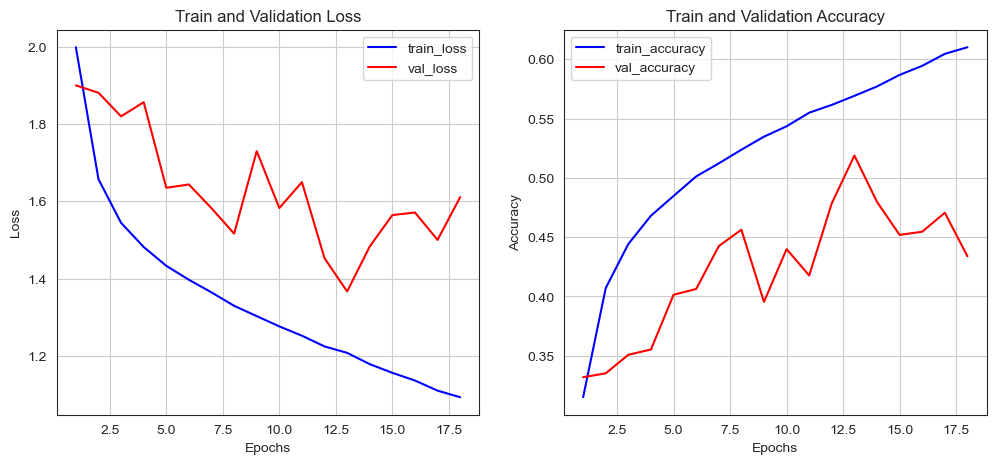

In [81]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import seaborn as sns 
sns.set_style('white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [82]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5206 - loss: 1.3567


[1.3624383211135864, 0.5167999863624573]